In [3]:
import torch
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader, ConcatDataset
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt

Data Augmentation

In [5]:
mean = [0.4319, 0.3926, 0.3274]
std = [0.3181, 0.2624, 0.3108]

jitterTransform= transforms.Compose([
    transforms.CenterCrop(224),
    transforms.ColorJitter(0.15, 0.5, 0.15, 0),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std)),
    ])

flipTransform= transforms.Compose([
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std)),
    ])

rotateTransform = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.RandomRotation(25),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std)),
    ])

comboTransform1 = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.RandomRotation(25),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std)),
    ])

comboTransform2 = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.ColorJitter(0.15, 0.5, 0.15, 0),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std)),
    ])

comboTransform3 = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.ColorJitter(0.15, 0.5, 0.15, 0),
    transforms.RandomRotation(25),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std)),
    ])

allTransform = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.ColorJitter(0.15, 0.5, 0.15, 0),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(25),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std)),
    ])



In [6]:
jitterData1 = datasets.Flowers102(root='data', split = 'train', download=True, transform=jitterTransform)
jitterData2 = datasets.Flowers102(root='data', split = 'train', download=True, transform=jitterTransform)
jitterData3 = datasets.Flowers102(root='data', split = 'train', download=True, transform=jitterTransform)

flipData1 = datasets.Flowers102(root='data', split = 'train', download=True, transform=flipTransform)
flipData2 = datasets.Flowers102(root='data', split = 'train', download=True, transform=flipTransform)
flipData3 = datasets.Flowers102(root='data', split = 'train', download=True, transform=flipTransform)

rotateTransform1 = datasets.Flowers102(root='data', split = 'train', download=True, transform=rotateTransform)
rotateTransform2 = datasets.Flowers102(root='data', split = 'train', download=True, transform=rotateTransform)
rotateTransform3 = datasets.Flowers102(root='data', split = 'train', download=True, transform=rotateTransform)

combo1Data1 = datasets.Flowers102(root='data', split = 'train', download=True, transform=comboTransform1)
combo1Data2 = datasets.Flowers102(root='data', split = 'train', download=True, transform=comboTransform1)
combo1Data3 = datasets.Flowers102(root='data', split = 'train', download=True, transform=comboTransform1)

combo2Data1 = datasets.Flowers102(root='data', split = 'train', download=True, transform=comboTransform2)
combo2Data2 = datasets.Flowers102(root='data', split = 'train', download=True, transform=comboTransform2)
combo2Data3 = datasets.Flowers102(root='data', split = 'train', download=True, transform=comboTransform2)

combo3Data1 = datasets.Flowers102(root='data', split = 'train', download=True, transform=comboTransform3)
combo3Data2 = datasets.Flowers102(root='data', split = 'train', download=True, transform=comboTransform3)
combo3Data3 = datasets.Flowers102(root='data', split = 'train', download=True, transform=comboTransform3)

allData1 = datasets.Flowers102(root='data', split = 'train', download=True, transform=allTransform)
allData2 = datasets.Flowers102(root='data', split = 'train', download=True, transform=allTransform)
allData3 = datasets.Flowers102(root='data', split = 'train', download=True, transform=allTransform)



In [7]:
trainData = ConcatDataset([jitterData1,
jitterData2,
jitterData3,flipData1,flipData2,flipData3, rotateTransform1,
rotateTransform2,
rotateTransform3,combo1Data1,
combo1Data2,
combo1Data3,

combo2Data1,
combo2Data2,
combo2Data3,

combo3Data1,
combo3Data2,
combo3Data3,allData1,
allData2,
allData3])

In [8]:
valTransform = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std)),
    ])

testTransform = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std)),
    ])

valData = datasets.Flowers102(root='data', split = 'val', download=True, transform=valTransform)
testData = datasets.Flowers102(root='data', split = 'test', download=True, transform=testTransform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


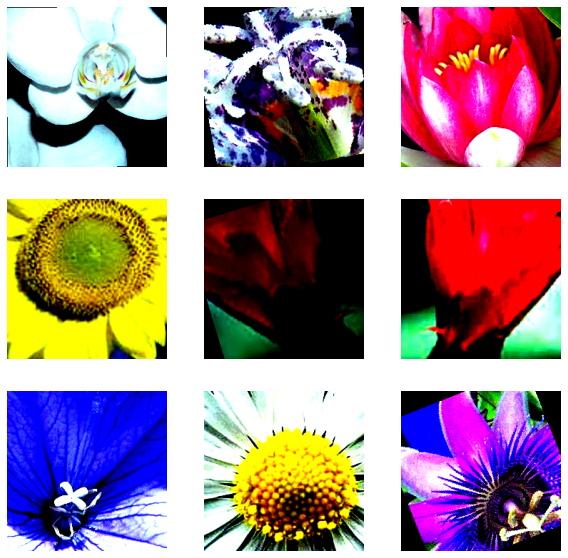

In [10]:
figure = plt.figure(figsize=(10, 10))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainData), size=(1,)).item()
    img, label = trainData[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()

In [13]:
class MyCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.convStack = nn.Sequential(
            nn.Conv2d(3, 32, 3),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, 3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, 3),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 256, 3),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(256, 512, 3),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Dropout(p=0.5),

            nn.Conv2d(512, 512, 3),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Dropout(p=0.5)
        )
        self.Flatten = nn.Flatten()
        self.LinearStack = nn.Sequential(

            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, 102), 
        )

    def forward(self, x):
        x = self.convStack(x)
        x = self.Flatten(x)
        x = self.LinearStack(x)
        return x
    


In [ ]:
# Hyperparameters
BATCH_SIZE = 32
NUM_EPOCHS = 200
LR = 0.0001
GAMMA = 0.9

# Device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

# Dataloaders
trainLoader = DataLoader(trainData, batch_size = 32, shuffle = True, num_workers = 4)
valLoader = DataLoader(valData, batch_size = 32, shuffle = False, num_workers = 4)
testLoader = DataLoader(testData, batch_size = 32, shuffle = False, num_workers = 4)

# Model
model = MyCNN()
model = model.to(device)

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=GAMMA, last_epoch=-1)

# Loss Function
loss = nn.CrossEntropyLoss()

In [ ]:
losses = []
accuracy = []
def trainModel(dataloader, model, lossFunction, optimizer):
    model.train()
    currentLoss = 0.0
    correct = 0
    total = 0
    epochLoss = 0

    for X, y in dataloader:
        X, y = X.to(device), y.to(device)
        total += y.size(0)

        optimizer.zero_grad()
        pred = model(X)
        loss = lossFunction(pred, y)
        loss.backward()
        optimizer.step()

        currentLoss += loss.item()
        epochLoss += lossFunction(pred, y).item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    epochLoss = epochLoss/total
    correct = correct/total

    losses.append(epochLoss)
    accuracy.append(correct * 100)
    print(f'Training: Accuracy {correct * 100:>0.1f}%, Loss: {currentLoss / len(dataloader):.5f}, Epoch Loss: {epochLoss:.5f}')

In [ ]:
def validateModel(dataloader, model, lossFunction):
    model.eval()
    total = 0
    correct = 0
    epochLoss = 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            total += y.size(0)
            epochLoss += lossFunction(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    epochLoss = epochLoss/total
    correct = (correct/total) * 100

    print(f"Validation: Accuracy: {(correct):>0.1f}%, Avg loss: {epochLoss:>8f} \n")
    return epochLoss, correct

In [ ]:
bestValAccuracy = 0.0
bestValLoss = float('inf')
bestEpoch = 0

valLosses = []
valAccuracies = []

for epoch in range(NUM_EPOCHS):
    print(f'Epoch {epoch+1}:')
    trainModel(trainLoader, model, loss, optimizer)
    valLoss, valAccuracy = validateModel(valLoader, model, loss)
    valLosses.append(valLoss)
    valAccuracies.append(valAccuracy)
    scheduler.step()

    if (valLoss < bestValLoss):
        bestValLoss = valLoss
        bestValAccuracy = valAccuracy
        bestEpoch = epoch+1

print(f'Best Accuracy: {bestValAccuracy}. Best Loss: {bestValLoss} Best Epoch: {bestEpoch}')

Extra fc layer: 
* lr 0.0001 - 48%